In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### 1. Buscar un conjunto de datos a analizar:

In [45]:
vinos = pd.read_csv('vinos.csv', index_col= 0)
vinos.sample(10)

,wine,year,rating,num_reviews,country,region,price,type,body,acidity
winery,,,,,,,,,,
Artadi,Pagos Viejos,2001,4.3,189,Espana,Vino de Espana,130.00,Tempranillo,4.0,2.0
Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
Bodegas Yzaguirre,Selection 1884 Vermouth Gran Reserva,N.V.,4.3,57,Espana,Cataluna,27.11,NaN,NaN,NaN
Remirez de Ganuza,Rioja Blanco,2017,4.2,421,Espana,Rioja,29.15,Rioja White,3.0,3.0
Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
La Rioja Alta,Vina Alberdi Crianza,2018,4.2,410,Espana,Rioja,13.58,Rioja Red,4.0,3.0
Emilio Moro,Malleolus,2014,4.2,1030,Espana,Ribera del Duero,31.95,Ribera Del Duero Red,5.0,3.0
La Rioja Alta,Vina Alberdi Crianza,2018,4.2,410,Espana,Rioja,13.58,Rioja Red,4.0,3.0
Enrique Mendoza,Santa Rosa,2017,4.2,420,Espana,Alicante,18.90,Red,4.0,3.0


In [46]:
vinos.reset_index(inplace=True)

<font color = 'violet'> Hacemos un reset index para que `winery`deje de ser el índex y poder usarla como variable.

#### 2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.
Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [47]:
vinos.describe(include='all')

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
count,7500,7500,7498,7500.000000,7500.000000,7500,7500,7500.000000,6955,6331.000000,6331.000000
unique,480,847,71,NaN,NaN,1,76,NaN,21,NaN,NaN
top,Contino,Reserva,2011,NaN,NaN,Espana,Rioja,NaN,Rioja Red,NaN,NaN
freq,457,467,1190,NaN,NaN,7500,2440,NaN,2357,NaN,NaN
mean,NaN,NaN,NaN,4.254933,451.109067,NaN,NaN,60.095822,NaN,4.158427,2.946612
std,NaN,NaN,NaN,0.118029,723.001856,NaN,NaN,150.356676,NaN,0.583352,0.248202
min,NaN,NaN,NaN,4.200000,25.000000,NaN,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,4.200000,389.000000,NaN,NaN,18.900000,NaN,4.000000,3.000000
50%,NaN,NaN,NaN,4.200000,404.000000,NaN,NaN,28.530000,NaN,4.000000,3.000000
75%,NaN,NaN,NaN,4.200000,415.000000,NaN,NaN,51.350000,NaN,5.000000,3.000000


In [48]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


<font color='violet'> En los vinos de Jerez no hay añada. Sale como N.V. 🧐​

In [49]:
vinos['acidity'].unique()

array([ 3.,  2.,  1., nan])

<font color='violet'> Elegimos como variable dependiente el precio y como variable independiente la añada. 

In [50]:
vinos.shape

(7500, 11)

In [51]:
vinos_missing = vinos.isnull().sum() * 100 / len(vinos)
vinos_missing

winery          0.000000
wine            0.000000
year            0.026667
rating          0.000000
num_reviews     0.000000
country         0.000000
region          0.000000
price           0.000000
type            7.266667
body           15.586667
acidity        15.586667
dtype: float64

In [52]:
categoricas = vinos.select_dtypes(include = "object")
categoricas.head()

,winery,wine,year,country,region,type
0,Teso La Monja,Tinto,2013,Espana,Toro,Toro Red
1,Artadi,Vina El Pison,2018,Espana,Vino de Espana,Tempranillo
2,Vega Sicilia,Unico,2009,Espana,Ribera del Duero,Ribera Del Duero Red
3,Vega Sicilia,Unico,1999,Espana,Ribera del Duero,Ribera Del Duero Red
4,Vega Sicilia,Unico,1996,Espana,Ribera del Duero,Ribera Del Duero Red


In [53]:
numericas = vinos.select_dtypes(exclude='object')
numericas

,rating,num_reviews,price,body,acidity
0,4.9,58,995.00,5.0,3.0
1,4.9,31,313.50,4.0,2.0
2,4.8,1793,324.95,5.0,3.0
3,4.8,1705,692.96,5.0,3.0
4,4.8,1309,778.06,5.0,3.0
...,...,...,...,...,...
7495,4.2,392,19.98,4.0,3.0
7496,4.2,390,16.76,4.0,3.0
7497,4.2,390,24.45,4.0,3.0
7498,4.2,389,64.50,5.0,3.0


In [54]:
vinos.duplicated().sum()

5452

<font color='violet'> Eliminamos los valores duplicados y comprobamos.

In [55]:
vinos = vinos.drop_duplicates()

In [56]:
vinos.shape

(2048, 11)

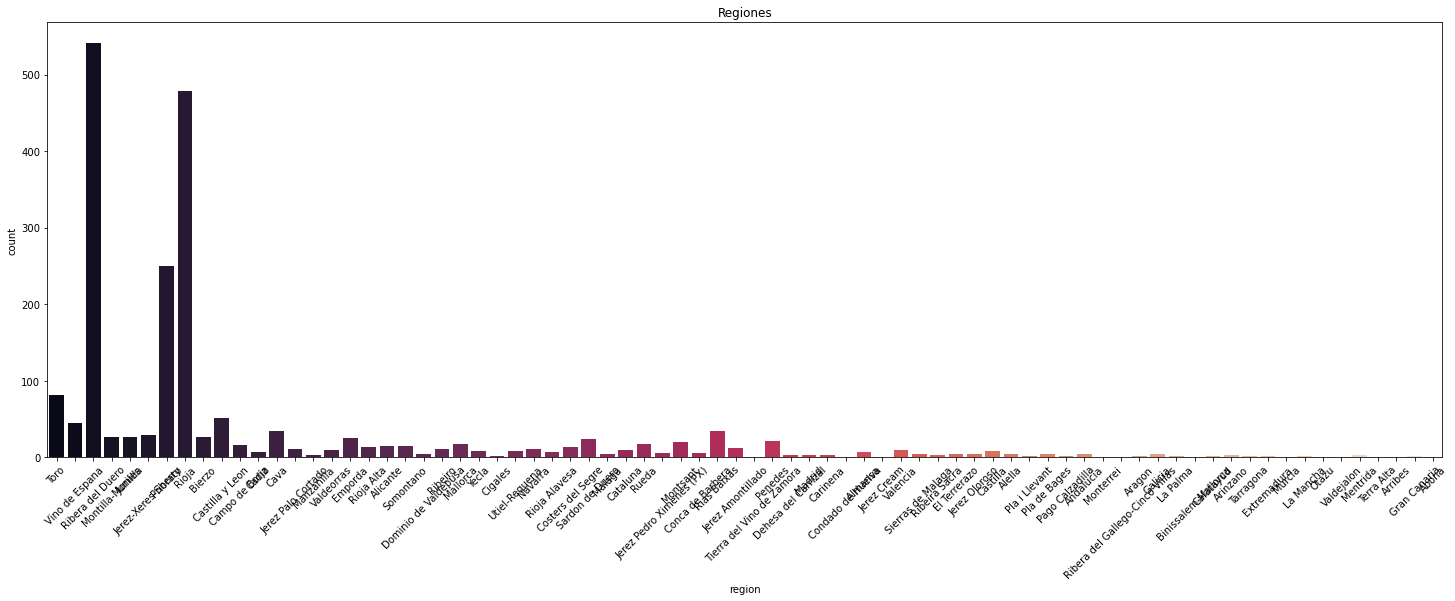

In [57]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.countplot(x="region", data=vinos, palette="rocket").set(title='Regiones');

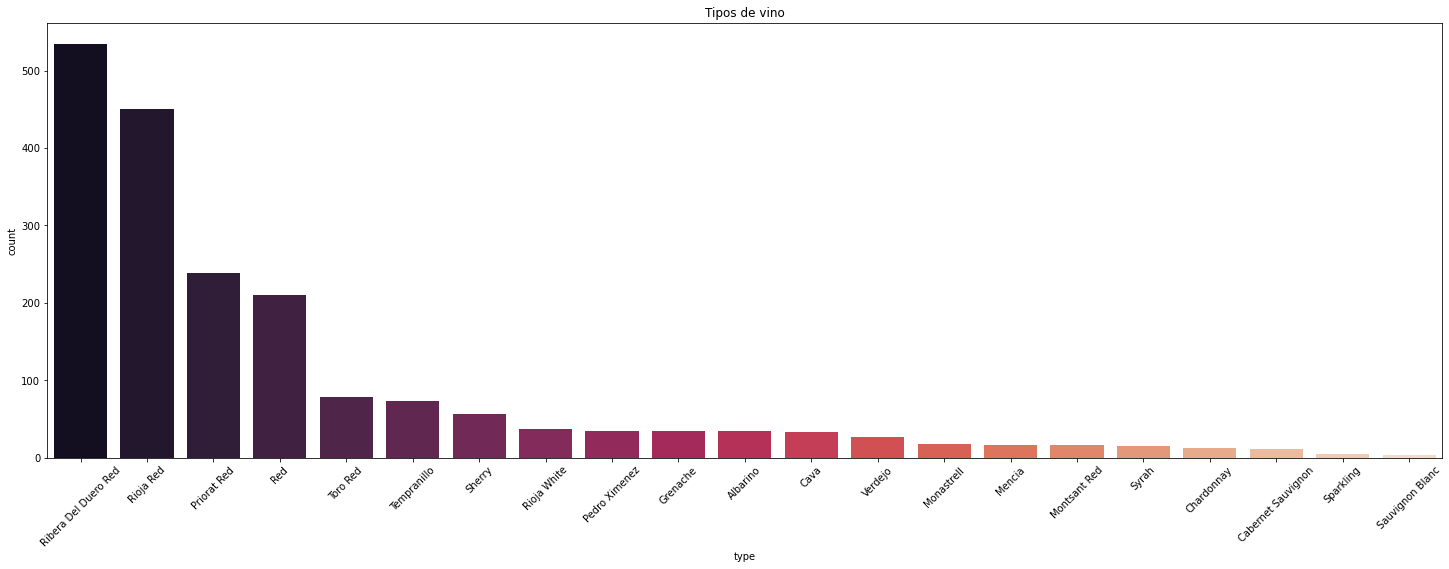

In [58]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.countplot(x="type", data=vinos, palette="rocket", order = vinos['type'].value_counts().index).set(title='Tipos de vino');

In [59]:
vinos['price'].value_counts()

75.00     16
95.00     12
34.90     12
59.90     12
26.90     11
          ..
75.92      1
47.52      1
94.20      1
185.15     1
995.00     1
Name: price, Length: 1292, dtype: int64

In [60]:
vinos['year'].value_counts()

2016    243
2017    240
2015    206
2018    196
2014    158
       ... 
1953      1
1972      1
1974      1
1931      1
1925      1
Name: year, Length: 71, dtype: int64

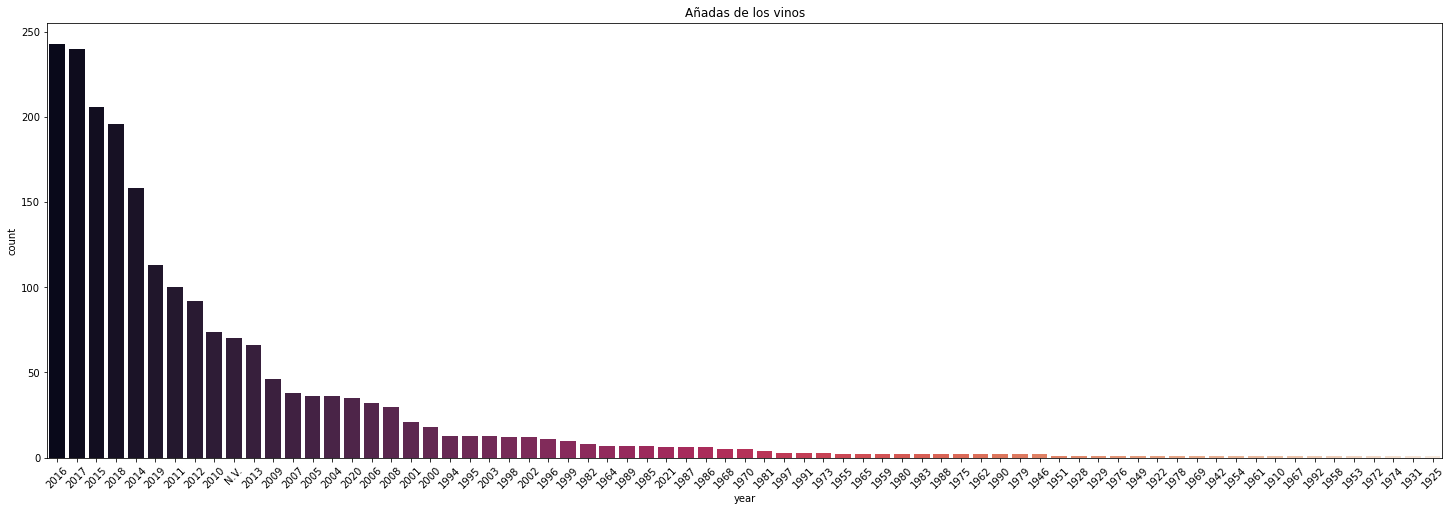

In [61]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.countplot(x="year", data=vinos, palette="rocket", order = vinos['year'].value_counts().index).set(title='Añadas de los vinos');

<font color = 'violet'> En esta gráfica podemos ver la cantidad de vinos que hay por año. Recordamos que el año "N.V." son los vinos de Jerez.

Hacer intervalos de precios con cut.

In [62]:
max(vinos['price'])

3119.08

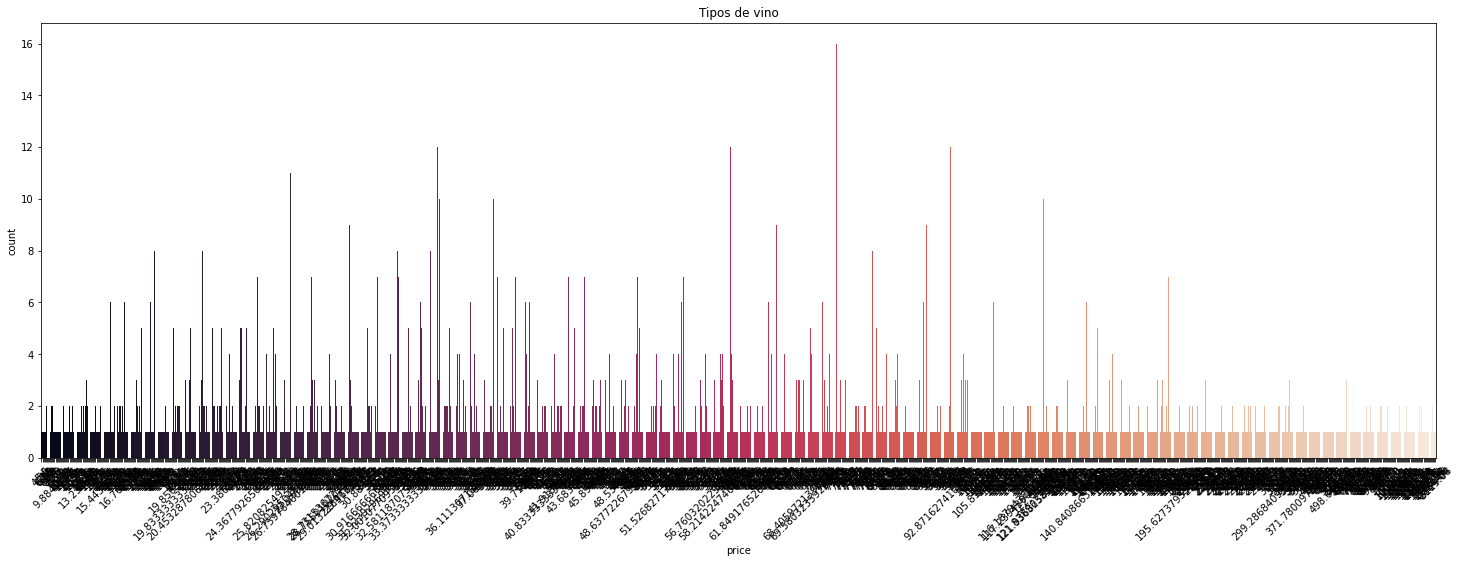

In [63]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.countplot(x="price", data=vinos, palette="rocket").set(title='Tipos de vino');

#### 3. Realiza el ajuste lineal simple utilizando diversas métricas y realiza una gráfica mostrando los resultados.

<font color='violet'> Para este ejercicio hemos elegido las variables 'price' y 'num_reviews'.

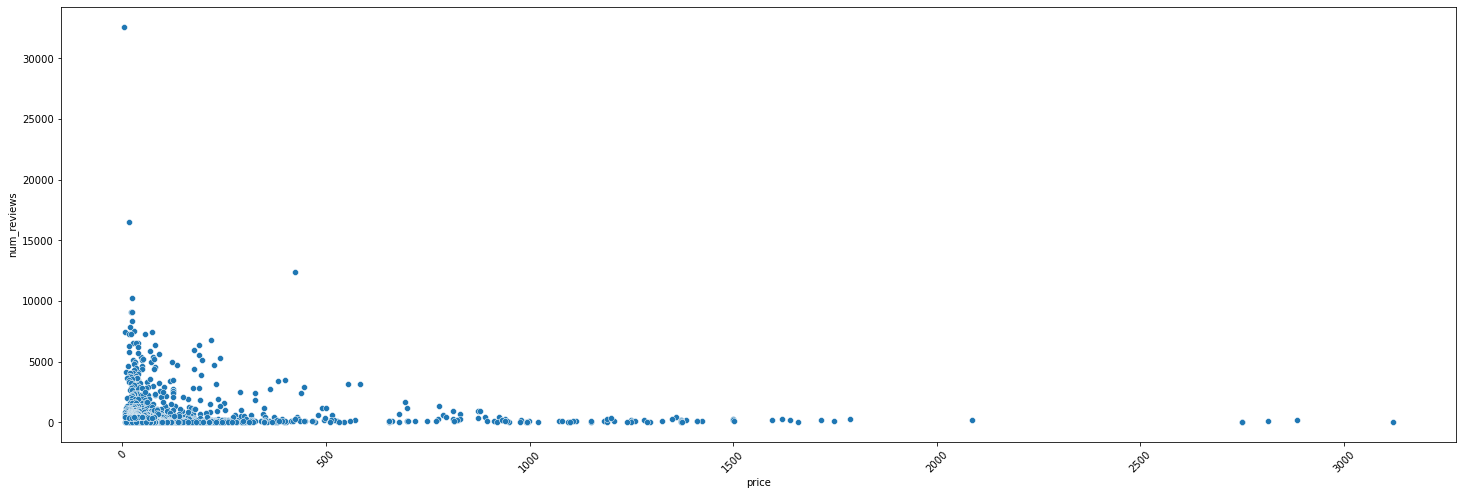

In [64]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.scatterplot(x="price", y = 'num_reviews', data=vinos, palette="rocket");

In [65]:
x=vinos['num_reviews'].values.reshape(-1, 1)
y= vinos['price'].values.reshape(-1, 1)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [67]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

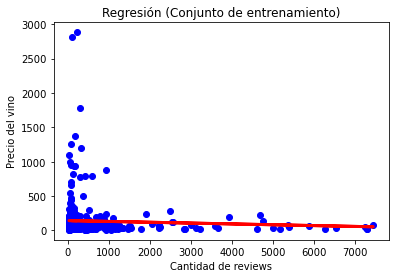

In [70]:
plt.scatter(x_test,y_test,color="blue")  
plt.plot(x_test,y_prediction,color="red",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Precio del vino')
plt.show()

In [69]:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('El MSE es',mean_squared_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.004051299071089254
El MAE es 137.8901591075837
El MSE es 73030.72252376835
EL RMSE es  270.24197032246553
Para el conjunto test:---------------
El valor de r2 score es  0.004902316520782102
El MAE es 128.7428316090749
El MSE es 76523.35057566763
EL RMSE es  276.62854259036186


#### 4. Interpretación de los resultados.
Ahora interpreta los resultados obtenidos del ajuste lineal simple y explica lo mejor posible la naturaleza de los mismos.